<a href="https://colab.research.google.com/github/rushi2012/TECHIS-JS-A-RUSHI/blob/main/Rain_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/forecast_data.csv')
df.head()

,time_epoch,time,temp_c,temp_f,is_day,condition,wind_mph,wind_kph,wind_degree,wind_dir,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feelslike_c,feelslike_f,windchill_c,windchill_f,heatindex_c,heatindex_f,dewpoint_c,dewpoint_f,will_it_rain,chance_of_rain,will_it_snow,chance_of_snow,vis_km,vis_miles,gust_mph,gust_kph,state,city
0,1634236200,2021-10-15 00:00,23.2,73.8,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",4.3,6.8,41,NE,1006.0,29.69,0.0,0.0,67,5,25.1,77.2,23.2,73.8,25.1,77.2,16.7,62.1,0,0,0,0,10.0,6.0,8.9,14.4,Andhra Pradesh,Amaravati
1,1634239800,2021-10-15 01:00,23.0,73.3,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",4.1,6.6,34,NE,1005.0,29.68,0.0,0.0,67,6,25.0,77.0,23.0,73.3,25.0,77.0,16.5,61.8,0,0,0,0,10.0,6.0,8.6,13.9,Andhra Pradesh,Amaravati
2,1634243400,2021-10-15 02:00,22.7,72.9,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",4.0,6.4,28,NNE,1005.0,29.67,0.0,0.0,67,8,24.9,76.8,22.7,72.9,24.9,76.8,16.4,61.5,0,0,0,0,10.0,6.0,8.4,13.4,Andhra Pradesh,Amaravati
3,1634247000,2021-10-15 03:00,22.5,72.5,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",3.8,6.1,22,NNE,1005.0,29.66,0.0,0.0,67,10,24.8,76.6,22.5,72.5,24.8,76.6,16.2,61.2,0,0,0,0,10.0,6.0,8.1,13.0,Andhra Pradesh,Amaravati
4,1634250600,2021-10-15 04:00,22.3,72.1,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",3.7,6.0,23,NNE,1005.0,29.68,0.0,0.0,68,10,24.7,76.5,22.3,72.1,24.7,76.5,16.1,61.0,0,0,0,0,10.0,6.0,7.9,12.7,Andhra Pradesh,Amaravati


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29568 entries, 0 to 29567
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time_epoch      29568 non-null  int64  
 1   time            29568 non-null  object 
 2   temp_c          29568 non-null  float64
 3   temp_f          29568 non-null  float64
 4   is_day          29568 non-null  int64  
 5   condition       29568 non-null  object 
 6   wind_mph        29568 non-null  float64
 7   wind_kph        29568 non-null  float64
 8   wind_degree     29568 non-null  int64  
 9   wind_dir        29568 non-null  object 
 10  pressure_mb     29568 non-null  float64
 11  pressure_in     29568 non-null  float64
 12  precip_mm       29568 non-null  float64
 13  precip_in       29568 non-null  float64
 14  humidity        29568 non-null  int64  
 15  cloud           29568 non-null  int64  
 16  feelslike_c     29568 non-null  float64
 17  feelslike_f     29568 non-null 

In [ ]:
df.isnull().sum()

time_epoch        0
time              0
temp_c            0
temp_f            0
is_day            0
condition         0
wind_mph          0
wind_kph          0
wind_degree       0
wind_dir          0
pressure_mb       0
pressure_in       0
precip_mm         0
precip_in         0
humidity          0
cloud             0
feelslike_c       0
feelslike_f       0
windchill_c       0
windchill_f       0
heatindex_c       0
heatindex_f       0
dewpoint_c        0
dewpoint_f        0
will_it_rain      0
chance_of_rain    0
will_it_snow      0
chance_of_snow    0
vis_km            0
vis_miles         0
gust_mph          0
gust_kph          0
state             0
city              0
dtype: int64

In [ ]:
df['time'] = pd.to_datetime(df['time'])

In [ ]:
df.will_it_snow.unique()

array([0])

In [ ]:
df.chance_of_snow.unique()

array([0])

In [ ]:
df.chance_of_rain.unique()

array([ 0, 21, 80,  1,  2, 63, 81, 60, 50, 10,  3, 29, 94, 85, 93, 51, 61,
       45, 62, 65, 91, 82])

In [ ]:
df.will_it_rain.unique()

array([0, 1])

In [ ]:
df1 = df.drop(['chance_of_snow', 'will_it_snow','condition','time'], axis=1)

In [ ]:
corr= df1.corr()
corr

,time_epoch,temp_c,temp_f,is_day,wind_mph,wind_kph,wind_degree,wind_dir,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feelslike_c,feelslike_f,windchill_c,windchill_f,heatindex_c,heatindex_f,dewpoint_c,dewpoint_f,will_it_rain,chance_of_rain,vis_km,vis_miles,gust_mph,gust_kph,state,city
time_epoch,1.000000,-0.131612,-0.131587,0.002710,0.060042,0.060070,0.259429,0.250054,0.686185,0.688035,0.010479,0.011205,0.080260,-0.028581,-0.146788,-0.146817,-0.129927,-0.129915,-0.147706,-0.147726,-0.016001,-0.016020,0.002626,0.024158,-0.097647,-0.094283,0.042777,0.042709,-0.000562,-0.001435
temp_c,-0.131612,1.000000,0.999984,0.448089,0.267645,0.267521,0.102912,0.094035,-0.459322,-0.460847,-0.106922,-0.104503,-0.524848,-0.238334,0.955068,0.955063,0.999628,0.999612,0.953677,0.953675,0.213842,0.213819,-0.040835,-0.145782,0.279052,0.285306,0.068385,0.068239,-0.064076,-0.084897
temp_f,-0.131587,0.999984,1.000000,0.448129,0.267647,0.267522,0.102901,0.094013,-0.459302,-0.460834,-0.106886,-0.104473,-0.524861,-0.238317,0.955067,0.955068,0.999614,0.999629,0.953672,0.953675,0.213827,0.213805,-0.040851,-0.145759,0.279020,0.285269,0.068385,0.068240,-0.064065,-0.084890
is_day,0.002710,0.448089,0.448129,1.000000,0.194623,0.194676,0.065103,0.073726,-0.032703,-0.033080,-0.014205,-0.013743,-0.259619,-0.006559,0.446888,0.446896,0.444640,0.444672,0.443929,0.443937,0.096156,0.096161,0.019283,0.005468,0.127725,0.121825,-0.078826,-0.078925,-0.004986,-0.004644
wind_mph,0.060042,0.267645,0.267647,0.194623,1.000000,0.999929,0.127415,0.048077,-0.108492,-0.109661,0.051496,0.051744,-0.149224,-0.037371,0.269561,0.269543,0.264273,0.264274,0.270224,0.270206,0.074075,0.074057,0.015279,-0.020026,0.125693,0.125958,0.908919,0.908837,0.054723,-0.092975
wind_kph,0.060070,0.267521,0.267522,0.194676,0.999929,1.000000,0.127490,0.048217,-0.108387,-0.109553,0.051545,0.051810,-0.149095,-0.037261,0.269468,0.269451,0.264143,0.264145,0.270137,0.270119,0.074132,0.074113,0.015327,-0.019899,0.125478,0.125739,0.908950,0.908867,0.054767,-0.093013
wind_degree,0.259429,0.102912,0.102901,0.065103,0.127415,0.127490,1.000000,0.625899,0.110109,0.110502,-0.046307,-0.045024,-0.100022,-0.143494,0.068485,0.068462,0.104093,0.104079,0.070253,0.070233,-0.027981,-0.027987,-0.027434,-0.059690,0.043545,0.050117,0.103274,0.103172,0.035301,-0.029807
wind_dir,0.250054,0.094035,0.094013,0.073726,0.048077,0.048217,0.625899,1.000000,0.081698,0.082129,-0.008772,-0.007372,-0.093363,-0.087763,0.062787,0.062750,0.095879,0.095854,0.062581,0.062547,-0.035996,-0.036020,0.021625,0.003573,0.012179,0.015866,0.030567,0.030451,0.065062,-0.029706
pressure_mb,0.686185,-0.459322,-0.459302,-0.032703,-0.108492,-0.108387,0.110109,0.081698,1.000000,0.995692,-0.027494,-0.028503,0.132803,-0.035273,-0.493311,-0.493317,-0.459978,-0.459953,-0.496050,-0.496068,-0.213843,-0.213826,-0.071719,-0.020073,-0.123383,-0.120051,-0.100758,-0.100777,-0.005846,0.078592
pressure_in,0.688035,-0.460847,-0.460834,-0.033080,-0.109661,-0.109553,0.110502,0.082129,0.995692,1.000000,-0.028393,-0.029435,0.133520,-0.035140,-0.494833,-0.494842,-0.461488,-0.461472,-0.497652,-0.497671,-0.214046,-0.214035,-0.069980,-0.017543,-0.124140,-0.120939,-0.102048,-0.102070,-0.006333,0.078180


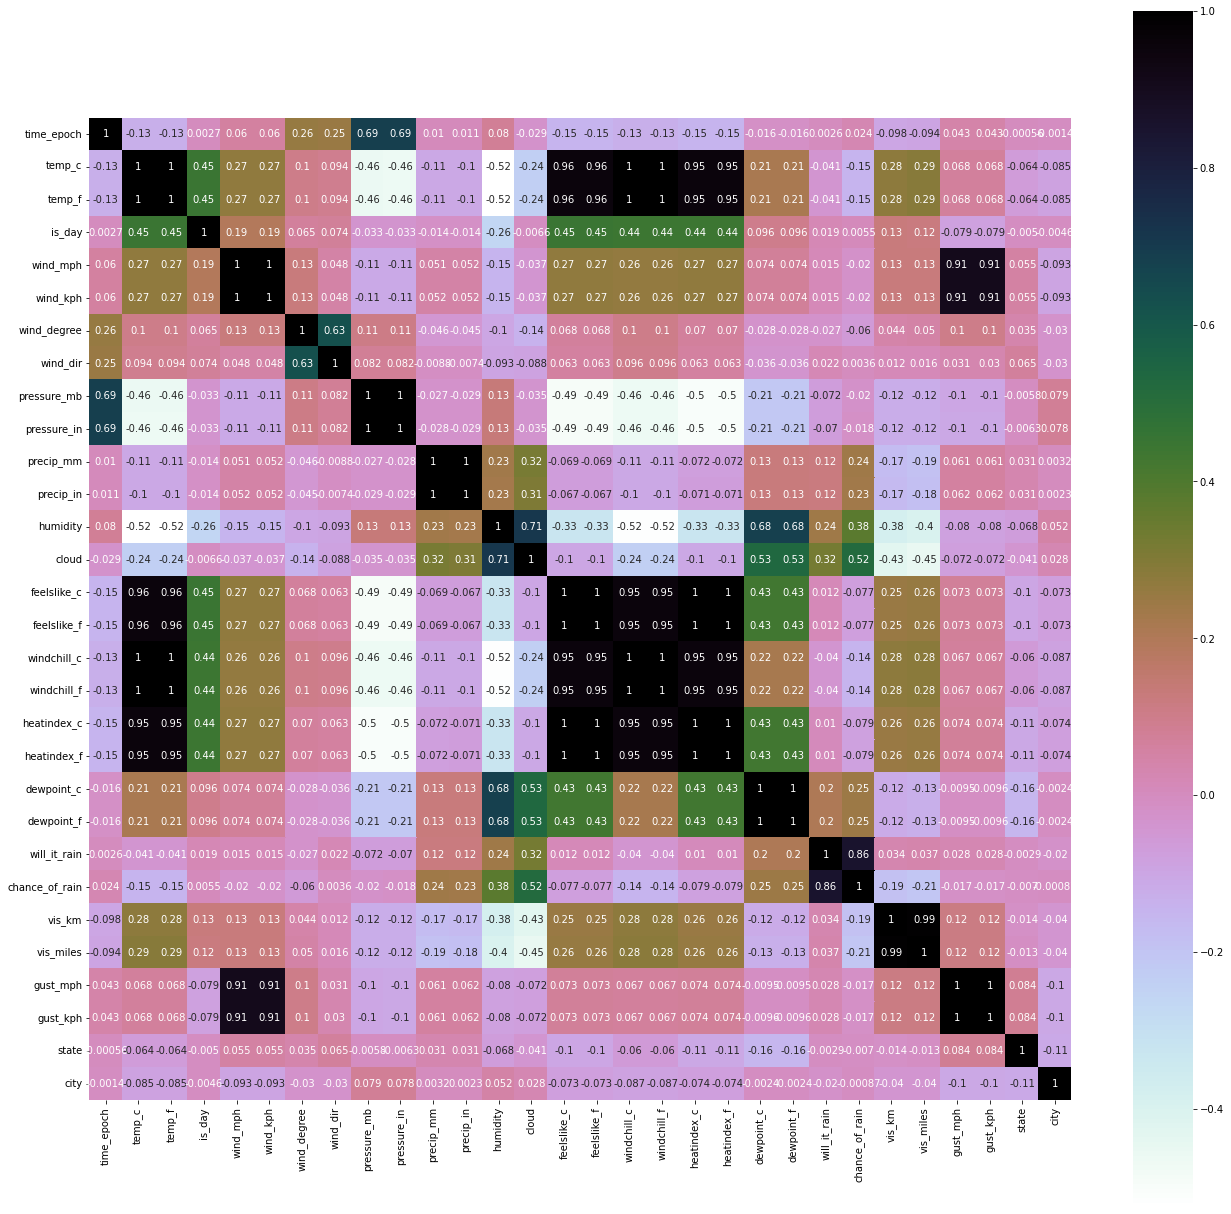

In [ ]:
plt.figure(figsize=(22,22))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

In [ ]:
corr.mean()

time_epoch        0.061804
temp_c            0.258786
temp_f            0.258788
is_day            0.167911
wind_mph          0.214883
wind_kph          0.214880
wind_degree       0.098168
wind_dir          0.090686
pressure_mb      -0.068112
pressure_in      -0.068599
precip_mm         0.074984
precip_in         0.074768
humidity         -0.020213
cloud             0.047771
feelslike_c       0.283625
feelslike_f       0.283618
windchill_c       0.259167
windchill_f       0.259169
heatindex_c       0.282575
heatindex_f       0.282570
dewpoint_c        0.193919
dewpoint_f        0.193907
will_it_rain      0.098640
chance_of_rain    0.076179
vis_km            0.095142
vis_miles         0.092914
gust_mph          0.148500
gust_kph          0.148434
state             0.006328
city             -0.002245
dtype: float64

In [ ]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
df['state'] = en.fit_transform(df['state'])
df['city'] = en.fit_transform(df['city'])

In [ ]:
from sklearn.model_selection import train_test_split # # Import Sklearn package's data splitting function
from sklearn import metrics
from sklearn import preprocessing

X = df.drop(['will_it_rain','chance_of_rain', 'time','temp_f', 'wind_mph','pressure_in','precip_in', 'wind_dir', 'feelslike_f', 'windchill_f','heatindex_f','dewpoint_f','vis_miles','gust_mph'], axis=1)
y = df['will_it_rain']

# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [ ]:
model = LogisticRegression(verbose=1)
model.fit(X_train, y_train) #Training the model

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(verbose=1)

In [ ]:
predictions = model.predict(X_test)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

[0 0 0 ... 0 0 0]

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      5385
           1       0.00      0.00      0.00       529

    accuracy                           0.91      5914
   macro avg       0.46      0.50      0.48      5914
weighted avg       0.83      0.91      0.87      5914



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5)
rfcl = rfcl.fit(X_train, y_train)
test_pred = rfcl.predict(X_test)
rfcl_score=rfcl.score(X_test , y_test)
print("The Random forest model accuracy is {}".format(rfcl_score))
print("The confusion matrix of Random Forest Model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Random forest model accuracy is 0.9299966181941156
The confusion matrix of Random Forest Model is
[[5281  104]
 [ 310  219]]
